### Data Augmentation and Image pipelines
- Real life datasets can be very large or small
- Image Pipelines are an efficient way to handle large datasets
- Data augmentation is a technique of augmenting data, which acts as a regularizer hence reduces overfitting


In [28]:
import keras
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_image_gen = ImageDataGenerator(
    rescale= 1/255.0,
    rotation_range= 40,
    width_shift_range = 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.3,
    horizontal_flip= True
)

test_gen = ImageDataGenerator(
    rescale= 1/255.0
)


In [19]:
train_gen = train_image_gen.flow_from_directory(
    "/Users/apoorvgarg/Downloads/tiny-imagenet-200/train",
    target_size=((224,224)),
    batch_size= 128,
    class_mode='categorical'

)

Found 100000 images belonging to 200 classes.


In [20]:
train_gen.class_indices

{'n01443537': 0,
 'n01629819': 1,
 'n01641577': 2,
 'n01644900': 3,
 'n01698640': 4,
 'n01742172': 5,
 'n01768244': 6,
 'n01770393': 7,
 'n01774384': 8,
 'n01774750': 9,
 'n01784675': 10,
 'n01855672': 11,
 'n01882714': 12,
 'n01910747': 13,
 'n01917289': 14,
 'n01944390': 15,
 'n01945685': 16,
 'n01950731': 17,
 'n01983481': 18,
 'n01984695': 19,
 'n02002724': 20,
 'n02056570': 21,
 'n02058221': 22,
 'n02074367': 23,
 'n02085620': 24,
 'n02094433': 25,
 'n02099601': 26,
 'n02099712': 27,
 'n02106662': 28,
 'n02113799': 29,
 'n02123045': 30,
 'n02123394': 31,
 'n02124075': 32,
 'n02125311': 33,
 'n02129165': 34,
 'n02132136': 35,
 'n02165456': 36,
 'n02190166': 37,
 'n02206856': 38,
 'n02226429': 39,
 'n02231487': 40,
 'n02233338': 41,
 'n02236044': 42,
 'n02268443': 43,
 'n02279972': 44,
 'n02281406': 45,
 'n02321529': 46,
 'n02364673': 47,
 'n02395406': 48,
 'n02403003': 49,
 'n02410509': 50,
 'n02415577': 51,
 'n02423022': 52,
 'n02437312': 53,
 'n02480495': 54,
 'n02481823': 55,
 '

In [21]:
import matplotlib.pyplot as plt

(128, 224, 224, 3) (128, 200)


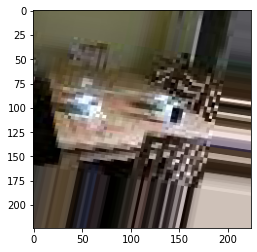

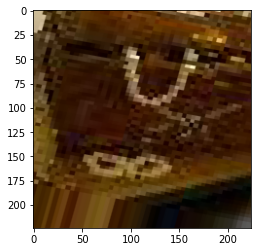

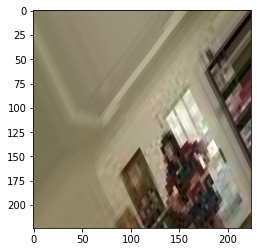

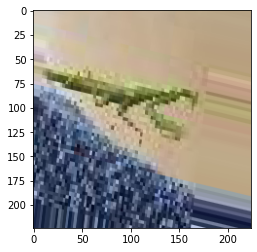

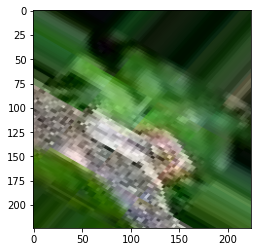

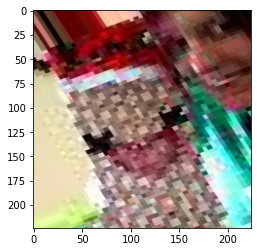

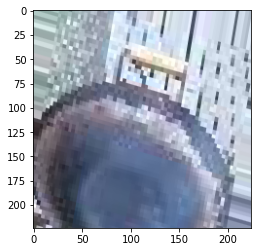

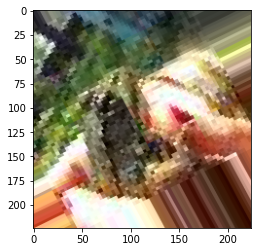

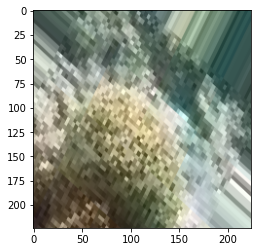

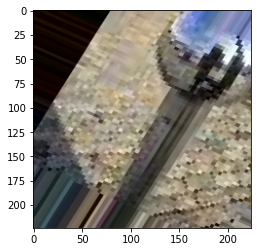

In [23]:
for (x,y) in train_gen:
    print(x.shape,y.shape)
    for i in range(10):
        plt.imshow(x[i])
        plt.show()
    break

In [24]:
class_ids = train_gen.class_indices

In [25]:
import os

In [34]:
def load_validation_data(target_size,no_of_classes):
    with open('/Users/apoorvgarg/Downloads/tiny-imagenet-200/val/val_annotations.txt') as f:
        lines = f.readlines()

        m = len(lines)
        X = np.empty((m,*target_size,3))
        Y = np.empty(m)

        for i,line in enumerate(lines):
            tokens = line.split()
            img_name = tokens[0]
            img_label = tokens[1]

            img_url = os.path.join("/Users/apoorvgarg/Downloads/tiny-imagenet-200/val/images",img_name)
            img = image.load_img(img_url)
            img = img.resize(target_size)
            X[i,] = np.array(img,dtype=np.float32)/255.0
            img.close()
            Y[i] = class_ids[img_label]

    return X,keras.utils.to_categorical(Y, num_classes=no_of_classes)

In [35]:
X_val, Y_val = load_validation_data((224,224),200)

In [36]:
print(X_val.shape)
print(Y_val.shape)

(10000, 224, 224, 3)
(10000, 200)
